In [33]:
import pandas as pd
import numpy as np
# import matplotlib.rcParams as rcp
# import matplotlib.pyplot as plt
# from matplotlib import rcparams
from pylab import rcParams
from matplotlib.cm import rainbow
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
data = pd.read_csv("heart_dataset.csv")
data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [38]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [40]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
data.index

RangeIndex(start=0, stop=303, step=1)

In [42]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


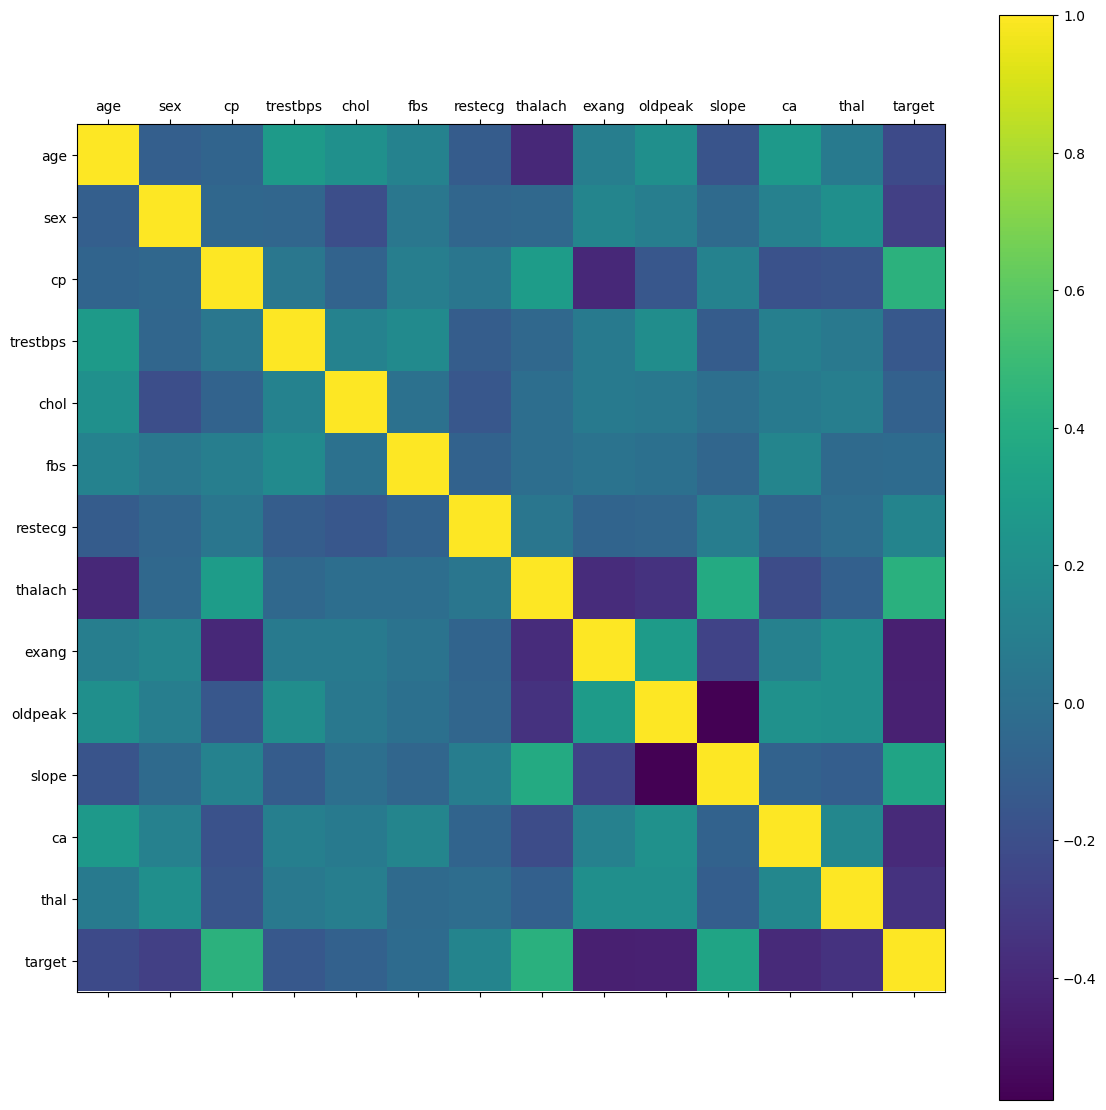

In [43]:
import matplotlib.pyplot as plt
rcParams["figure.figsize"] = 20,14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

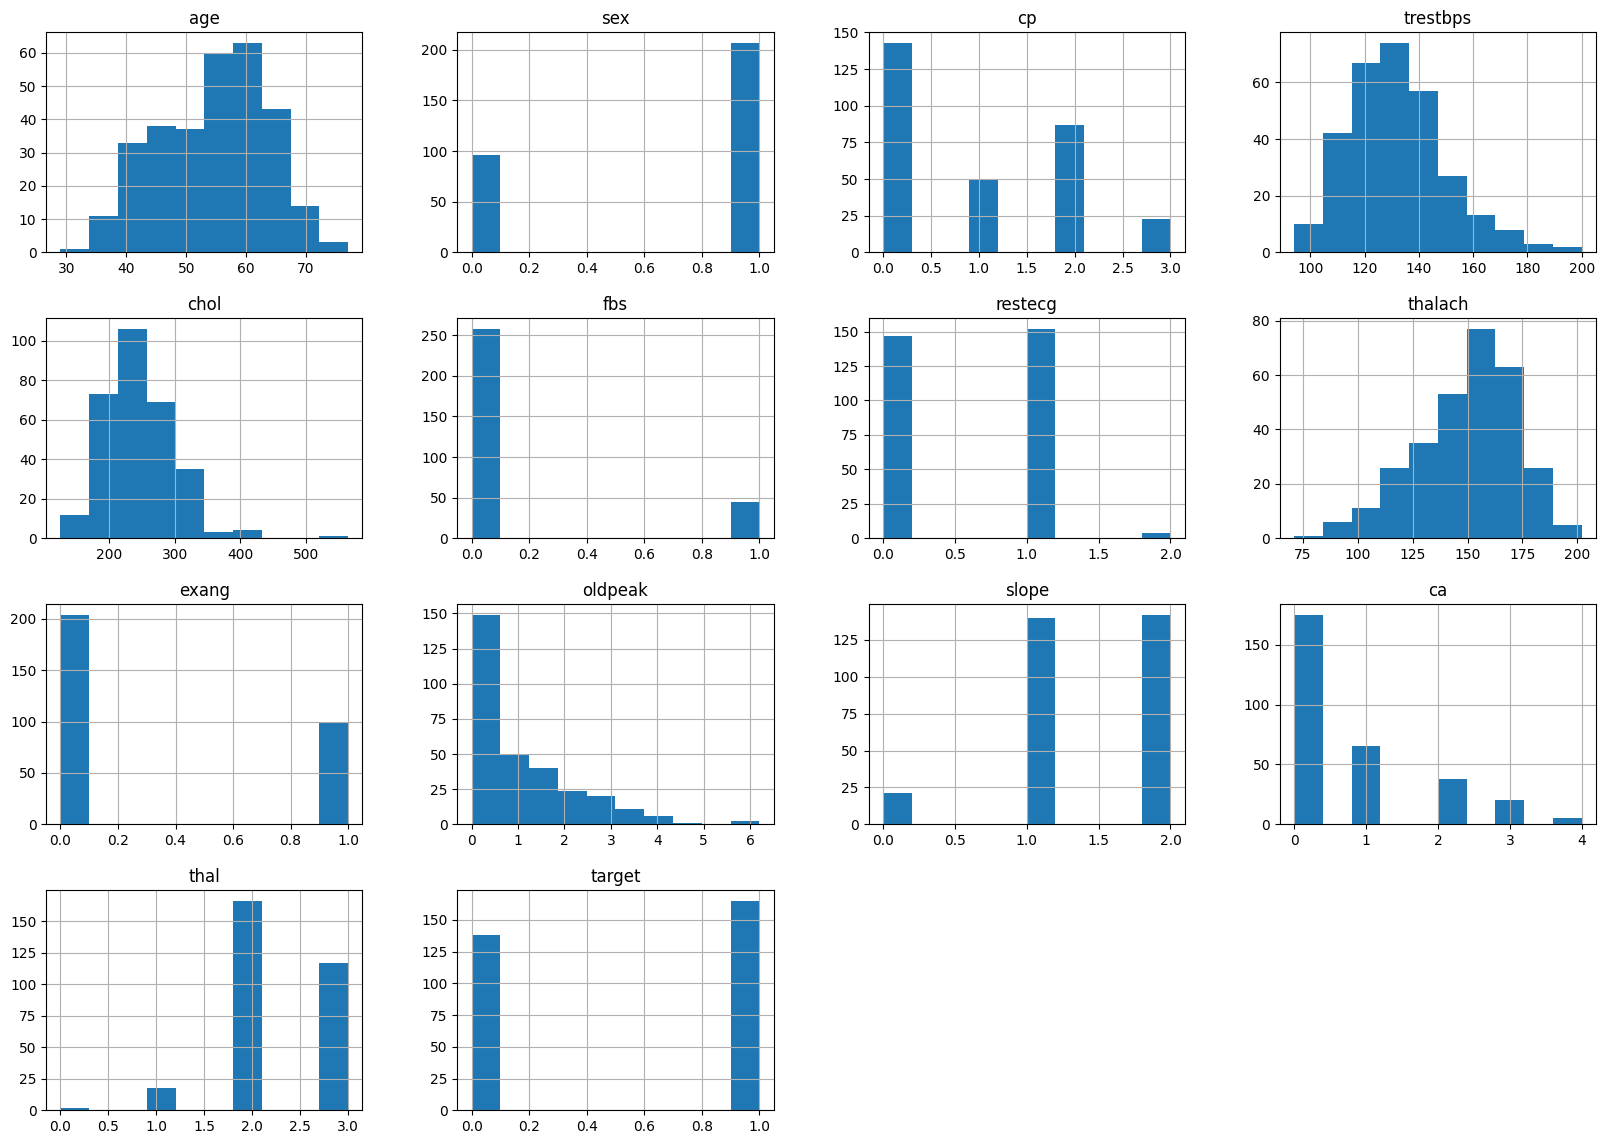

In [45]:
data.hist()

Text(0.5, 1.0, 'Target Class of each Count')

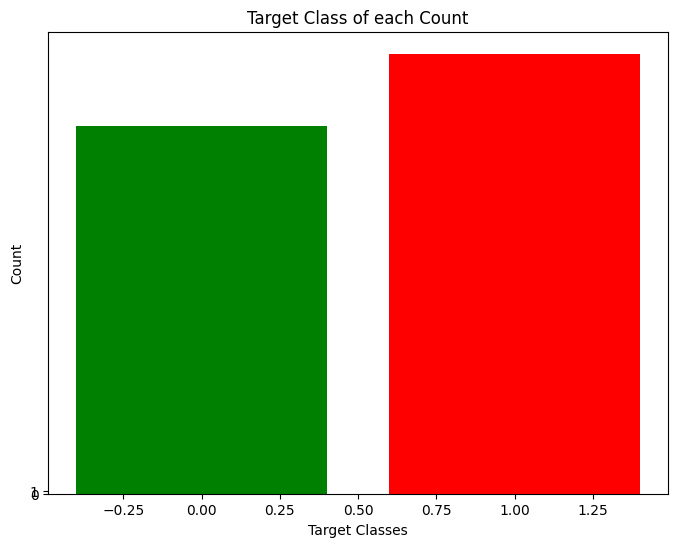

In [46]:
rcParams["figure.figsize"] = 8, 6
plt.bar(data["target"].unique(), data["target"].value_counts(), color =["red", "green"]) 
plt.yticks([0,1])
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.title("Target Class of each Count")

In [48]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [49]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [50]:
# from sklearn.preprocessing import StandardScaler
# standardScaler = StandardScaler()
# columns_to_scale = ["age", 'trestbps', 'chol', 'thalach', 'oldpeak']
# data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
data.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Initialize a list to store the scores
knn_scores = []

# Loop over a range of k values
k_values = range(1, 21)  # Testing k from 1 to 20
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    score = knn_classifier.score(X_test, y_test)
    knn_scores.append(score)
    print(f'Accuracy for k={k}: {score:.4f}')

Accuracy for k=1: 0.6230
Accuracy for k=2: 0.6393
Accuracy for k=3: 0.6557
Accuracy for k=4: 0.6721
Accuracy for k=5: 0.6885
Accuracy for k=6: 0.7213
Accuracy for k=7: 0.7049
Accuracy for k=8: 0.6885
Accuracy for k=9: 0.6721
Accuracy for k=10: 0.7049
Accuracy for k=11: 0.7541
Accuracy for k=12: 0.7377
Accuracy for k=13: 0.7377
Accuracy for k=14: 0.7377
Accuracy for k=15: 0.6885
Accuracy for k=16: 0.7213
Accuracy for k=17: 0.6885
Accuracy for k=18: 0.6885
Accuracy for k=19: 0.7049
Accuracy for k=20: 0.6721


In [60]:
# plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
# for i in range(1,21):
#     plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
# plt.xticks([i for i in range(1, 21)])
# plt.xlabel('Number of Neighbors (K)')
# plt.ylabel('Scores')
# plt.title('K Neighbors Classifier scores for different K values')

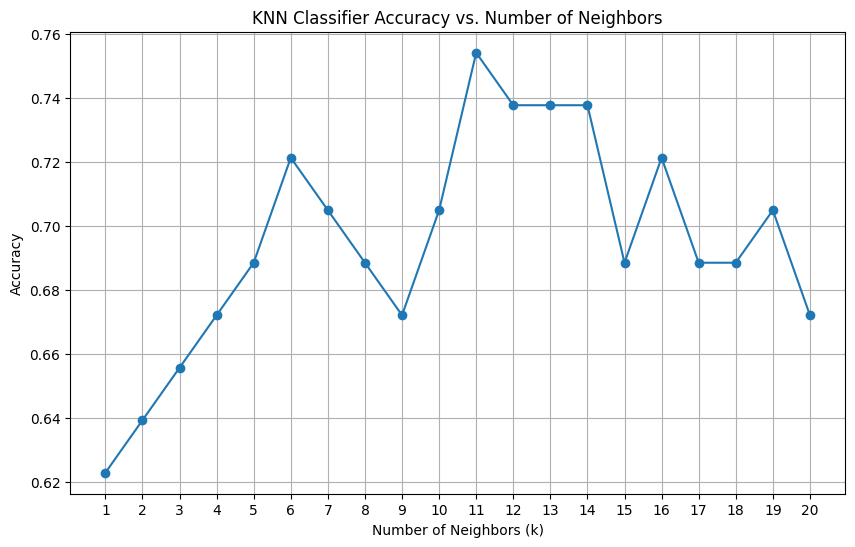

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores, marker='o')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [57]:
# From the plot above, it is clear that the maximum score achieved was 0.75 for the 11 neighbors.

In [66]:
print("The score of K Neighbor classifier is {}% with {} nieghbors.". format(knn_scores[7]* 100,11) )

The score of K Neighbor classifier is 68.85245901639344% with 11 nieghbors.


In [59]:
# Lets test using Support Vector Classifier

In [68]:

# Define the kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize a list to store the scores
svc_scores = []

# Loop over the kernels
for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train, y_train)
    score = svc_classifier.score(X_test, y_test)
    svc_scores.append(score)
    print(f'Accuracy with {kernel} kernel: {score:.4f}')

Accuracy with linear kernel: 0.8689
Accuracy with poly kernel: 0.7377
Accuracy with rbf kernel: 0.7049
Accuracy with sigmoid kernel: 0.5246


In [69]:
best_kernel = kernels[svc_scores.index(max(svc_scores))]
best_score = max(svc_scores)
print(f'Best kernel: {best_kernel}')
print(f'Best Accuracy: {best_score: .4f}')

Best kernel: linear
Best Accuracy:  0.8689


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2'),
  Text(1.4000000000000001, 0, '1.4')])

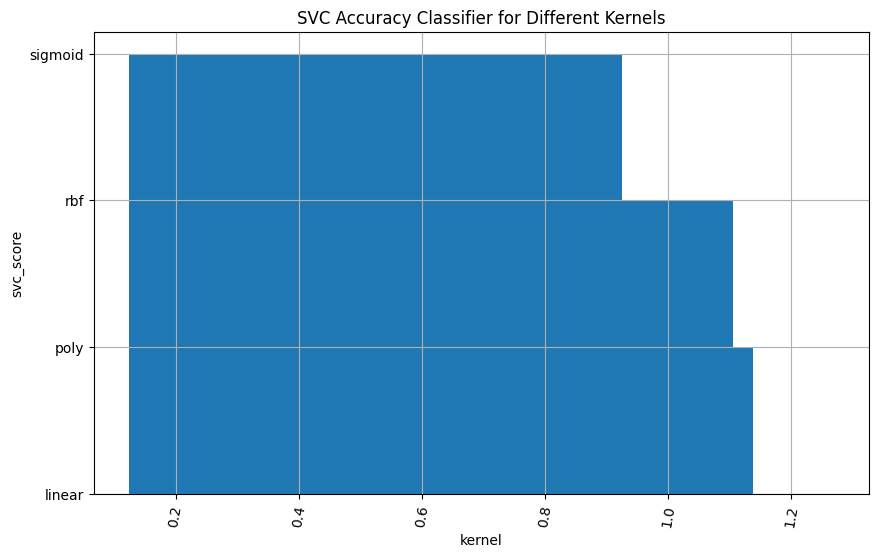

In [70]:
plt.figure(figsize =(10,6))
plt.bar(svc_scores, kernels)
plt.xlabel("kernel")
plt.ylabel("svc_score")
plt.title("SVC Accuracy Classifier for Different Kernels")
plt.grid()
plt.xticks(rotation = 80)

In [93]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 86.88524590163934% with linear kernel.


In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train, X_test, and y_test are defined
dt_scores = []
# It creates a range of values for the max_features parameter, starting from 1 and going up to the number of columns in the feature matrix X. This range is stored in the i_values variable.
i_values = range(1, len(X.columns) + 1)
# Train the Decision Tree Classifier for different max_features
for i in i_values:
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(X_train, y_train)
    score = dt_classifier.score(X_test, y_test)
    dt_scores.append(score)
    print(f'Accuracy with max_features = {i}: {score:.4f}')

# Check lengths of i_values and dt_scores
# print(len(i_values), len(dt_scores))



Accuracy with max_features = 1: 0.7869
Accuracy with max_features = 2: 0.8525
Accuracy with max_features = 3: 0.8033
Accuracy with max_features = 4: 0.8852
Accuracy with max_features = 5: 0.7049
Accuracy with max_features = 6: 0.7541
Accuracy with max_features = 7: 0.7869
Accuracy with max_features = 8: 0.7705
Accuracy with max_features = 9: 0.7869
Accuracy with max_features = 10: 0.7377
Accuracy with max_features = 11: 0.8197
Accuracy with max_features = 12: 0.7541
Accuracy with max_features = 13: 0.8361
Accuracy with max_features = 14: 0.7705
Accuracy with max_features = 15: 0.7869
Accuracy with max_features = 16: 0.7541
Accuracy with max_features = 17: 0.8033
Accuracy with max_features = 18: 0.7869
Accuracy with max_features = 19: 0.8033
Accuracy with max_features = 20: 0.7869
Accuracy with max_features = 21: 0.8033
Accuracy with max_features = 22: 0.8525
Accuracy with max_features = 23: 0.7869
Accuracy with max_features = 24: 0.8033
Accuracy with max_features = 25: 0.7705
Accuracy 

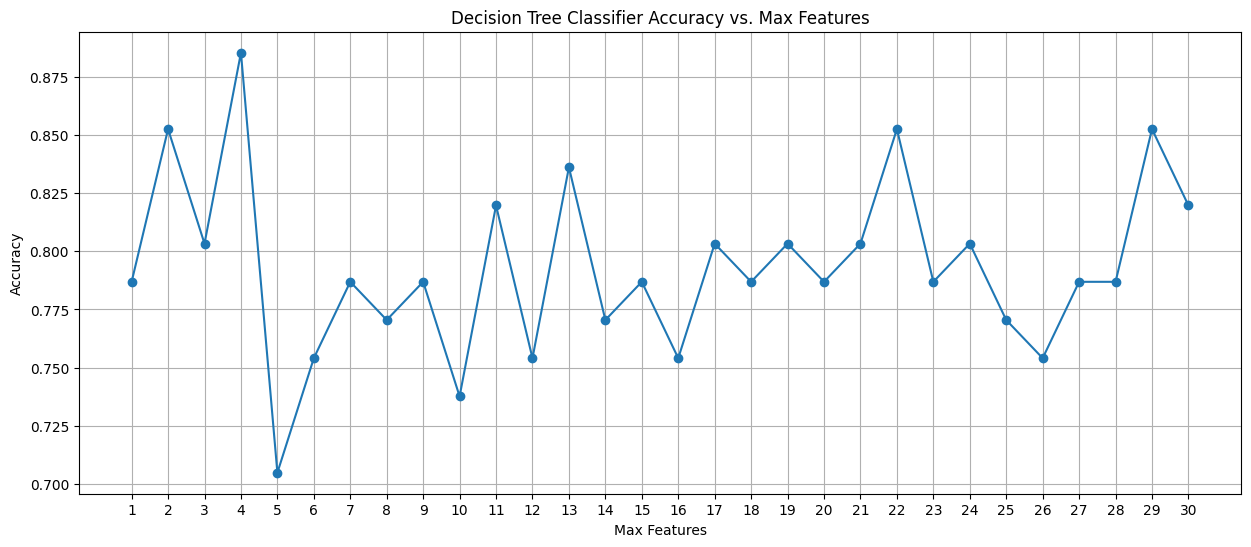

In [84]:
# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(i_values, dt_scores, marker='o')
plt.title('Decision Tree Classifier Accuracy vs. Max Features')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(X.columns) + 1))
plt.grid()
plt.show()

In [ ]:
# The maximum score archieve is 0.880 for 5 dt_classifier

In [94]:
print("The score of dt_classifier is {}% with {} Decision Tree Classifier .". format(dt_scores[7]* 100,5) )

The score of dt_classifier is 77.04918032786885% with 5 Decision Tree Classifier .


In [104]:
rf_score = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_score.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

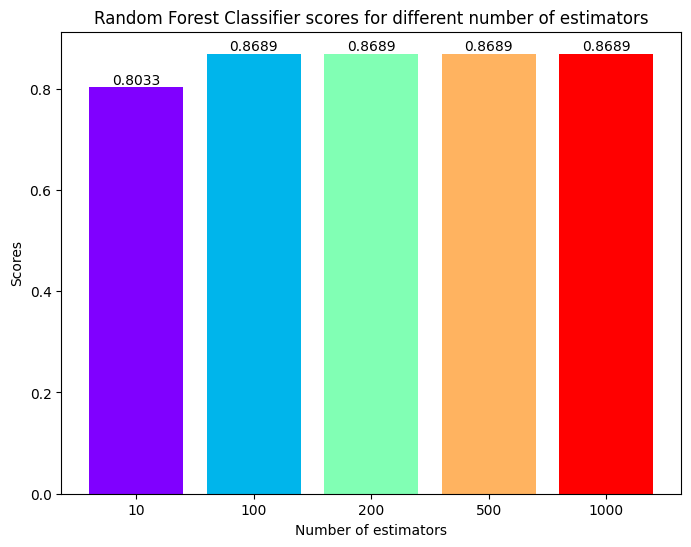

In [111]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_score, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_score[i], f'{rf_score[i]:.4f}', ha='center', va='bottom')
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')